In [14]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_data = pd.merge(ride_data, city_data, on="city", how ="left")

# Display the data table for preview
merge_data.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

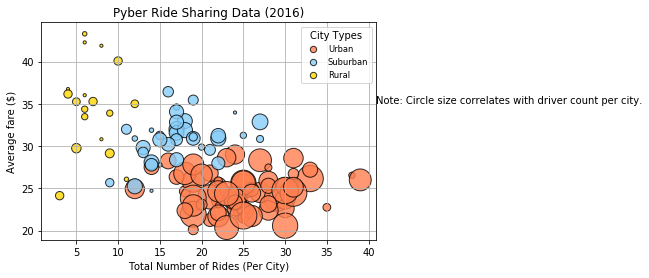

In [15]:
# Obtain the x and y coordinates for each of the three city types
total_rides = merge_data.groupby(['city'])['ride_id'].count()
avg_fare = merge_data.groupby(['city'])['fare'].mean()
total_drivers = merge_data.groupby(['city'])['driver_count'].mean()
city_type = city_data.set_index('city')['type']
df = pd.DataFrame({ 
        "Average Fare": avg_fare,
        "Total Rides": total_rides,
        "Driver Count": total_drivers,
        "City Type": city_type })
# Build the scatter plots for each city types
urban = df.loc[df["City Type"]=="Urban"]
suburban = df.loc[df["City Type"]=="Suburban"]
rural = df.loc[df["City Type"]=="Rural"]
# Scatterplot for each city types 
plt.scatter(urban['Total Rides'],urban['Average Fare'], marker="o", 
            facecolor ="coral", edgecolor ="k",s=urban['Driver Count']*10, 
            alpha=0.8, label='Urban')
plt.scatter(suburban['Total Rides'],suburban['Average Fare'], marker="o", 
            facecolor ="lightskyblue", edgecolor ="k",
            s=suburban['Driver Count']*10, alpha=0.8, label='Suburban')
plt.scatter(rural['Total Rides'],rural['Average Fare'], marker="o", 
            facecolor ="gold", edgecolor ="k",
            s=rural['Driver Count']*10, alpha=0.8, label='Rural')
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average fare ($)")
plt.grid()
# Create a legend
labels = ["Urban", "Suburban", "Rural"]
lgnd = plt.legend(labels, title = "City Types", fontsize = 'small', scatterpoints= 1)
for handle in lgnd.legendHandles:
    handle.set_sizes([40])
# Incorporate a text label regarding circle size
plt.figtext(x = .90, y = .60 , s = "Note: Circle size correlates with driver count per city.")

# Save Figure
plt.savefig('Bubble_Plot.png')
# Show plot 
plt.show()

## Total Fares by City Type

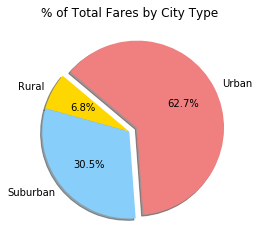

In [20]:
# Calculate Type Percents
total_fares = merge_data.groupby('type')['fare'].sum()
labels = ["Rural","Suburban","Urban"]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,0.1)

# Build Pie Chart
plt.pie(total_fares, explode=explode, 
        labels=labels, colors=colors,autopct="%1.1f%%", 
        shadow= True, startangle = 140)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig('Total_Fares_by_City.png')
plt.show()

## Total Rides by City Type

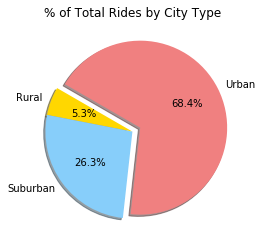

In [21]:
# Calculate Ride Percents
rides_type = merge_data.groupby('type')['ride_id'].count()
explode = (0,0,0.1)

# Build Pie Chart
plt.pie(rides_type, explode=explode, 
        labels=labels, colors=colors,autopct="%1.1f%%", 
        shadow= True, startangle = 150)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig('Total_Rides_by_City.png')
plt.show()

In [18]:
# Show Figure
plt.show()

## Total Drivers by City Type

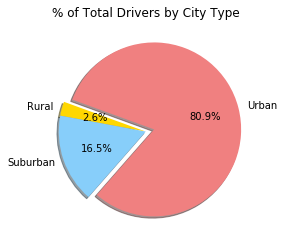

In [22]:
# Calculate Driver Percents
drivers_type = city_data.groupby('type')['driver_count'].sum()
explode = (0,0,0.1)
# Build Pie Chart
plt.pie(drivers_type, explode=explode, 
        labels=labels, colors=colors,autopct="%1.1f%%",shadow= True, startangle = 160)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig('Total_Drivers_by_City.png')
plt.show()